# BANK NOTES CLASSIFICATION

### Problem Statement 

Banknotes are one of the most important assets of a country. 
Some criminals introduce fake notes which bear a resemblance to original note to create discrepancies of the money in the financial market. 
It is difficult for humans to tell true and fake banknotes apart especially because they have a lot of similar features. 
Fake notes are created with precision, hence there is need for an efficient algorithm which accurately predicts whether a banknote is genuine or not.

In [2]:
# Dataset

These datasets have different features and the goal of my analysis is to classify genuine (label 0) and counterfeit (label 1) banknotes comparing different features through Machine Learning algorithms.

In [4]:
# Tools and technoLogies

# Python
# Pandas, matplotlib, seaborn, numpy
# tkinter
# flask

In [3]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import Dataset

df=pd.read_csv('banknotes.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


The data file banknote_authentication.csv is the source of information for the classification problem. 
The number of instances (rows) in the data set is 1372, and the number of variables (columns) is 5.

In [6]:
df.shape

(1372, 5)

In [7]:
df.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [8]:
# No missing values are present in dataset 

In [9]:
df.duplicated().sum()

24

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
# We have 24 duplicates samples and  We have drop the duplicates samples......Duplicates rows
# No duplicates columns present

In [12]:
df.shape 

(1348, 5)

In [13]:
s1=df['Class'].value_counts()             # Its balance data
s1

0    738
1    610
Name: Class, dtype: int64

In [14]:
df.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

<AxesSubplot:>

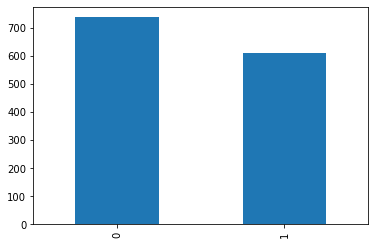

In [15]:
s1.plot(kind='bar')

The instances are divided into training, selection, and testing subsets. There are 824 instances for training (60%), 274 cases for selection (20%), and 274 cases for testing (20%).

In [16]:
# Dataset is balanced
# count 1... 610..... fake class
# count 0... 762..... real class

In [17]:
# Statistical information

In [18]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [19]:
## Variance     -7.04 to 6.82                 ( range)
## Skewness     -13.77 to 12.95
## Curtosis     -5.28 to 17.92
## Entropy      -8.54 to 2.44

In [20]:
# Graphically representation

# Histogram

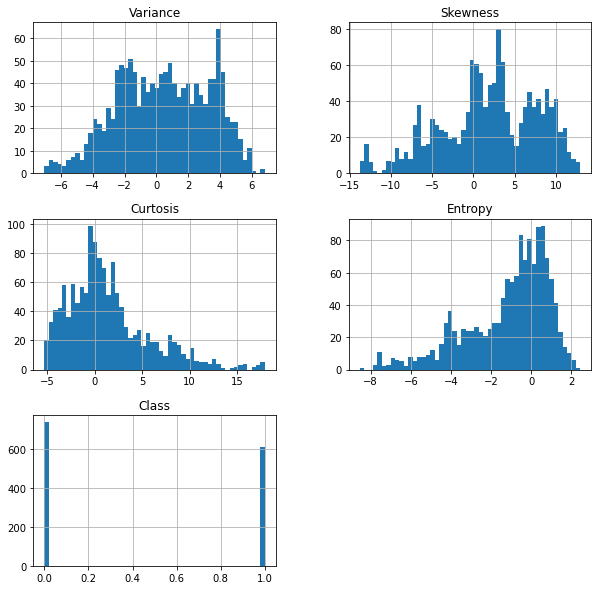

In [21]:
df.hist(figsize=(10,10),bins=50)        #(Graphical representaion for whole dataset )
plt.show()

In [22]:
## Input features follows normal distribution

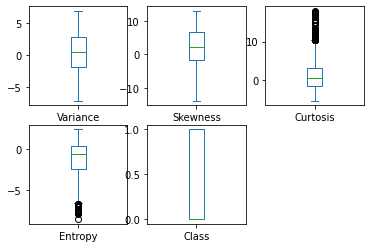

In [23]:
df.plot(kind='box',subplots=True,layout=(2,3),sharex=False)
plt.show()

In [24]:
# In curtosis and entropy outliers are present
# it may be for fake note (not removing outliers)

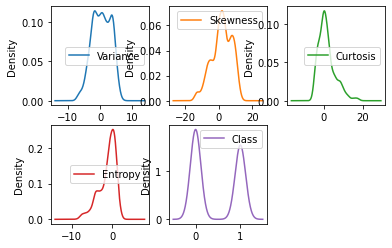

In [25]:
df.plot(kind='kde',subplots=True,layout=(2,3),sharex=False)      #(kde=kernel density)
plt.show()

In [26]:
## Violin plot

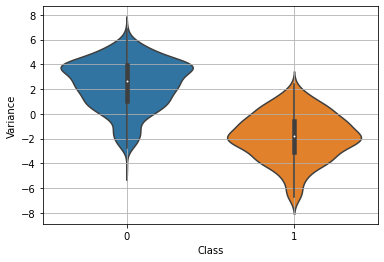

In [27]:
sns.violinplot(x='Class',y='Variance',data=df)
plt.grid()
plt.show()

In [28]:
# IF your variance is high then it will be real class

In [29]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [30]:
df.groupby('Class').describe()          #(to check the range of class (min,max))

Variance                                                                 \
         count      mean       std     min      25%     50%       75%     max   
Class                                                                           
0        738.0  2.358629  1.989764 -4.2859  1.00405  2.6314  3.911625  6.8248   
1        610.0 -1.868443  1.881183 -7.0421 -3.06145 -1.8061 -0.541770  2.3917   

      Skewness                                                             \
         count      mean       std      min       25%       50%       75%   
Class                                                                       
0        738.0  4.308220  5.105853  -6.9321  0.484718  5.690500  8.684250   
1        610.0 -0.993576  5.404884 -13.7731 -5.810025  0.172775  3.189275   

               Curtosis                                                \
           max    count      mean       std     min     25%       50%   
Class                                                                   
0      12.9516    738.0  0.806311  3.247608 -4.9417 -1.7097  0.689895   
1       9.6014    610.0  2.148271  5.261811 -5.2861 -1.3575  0.373720   

                        Entropy                                        \
           75%      max   count      mean       std     min       25%   
Class                                                                   
0      2.64780   8.8294   738.0 -1.104299  2.097322 -8.5482 -2.209500   
1      5.62635  17.9274   610.0 -1.246641  2.070984 -7.5887 -2.458375   

                                 
           50%      75%     max  
Class                            
0     -0.51682  0.45203  2.4495  
1     -0.66165  0.34179  2.1353

In [31]:
# Variance for real notes.... -4.2 to 6.8
# Variance for fake notes.... -7.0 to 2.3

In [32]:
# Skewness for real notes.... -6.9 to 12.9
# Skewness for fake notes.... -5.8 to 9.6

# Curtosis for real notes.... -4.9 to 8.82
# Curtosis for fake notes.... -5.2 to 17.9

# Entropy for real notes.... -8.5 to 2.4
# Entropy for fake notes.... -7.5 to 2.1

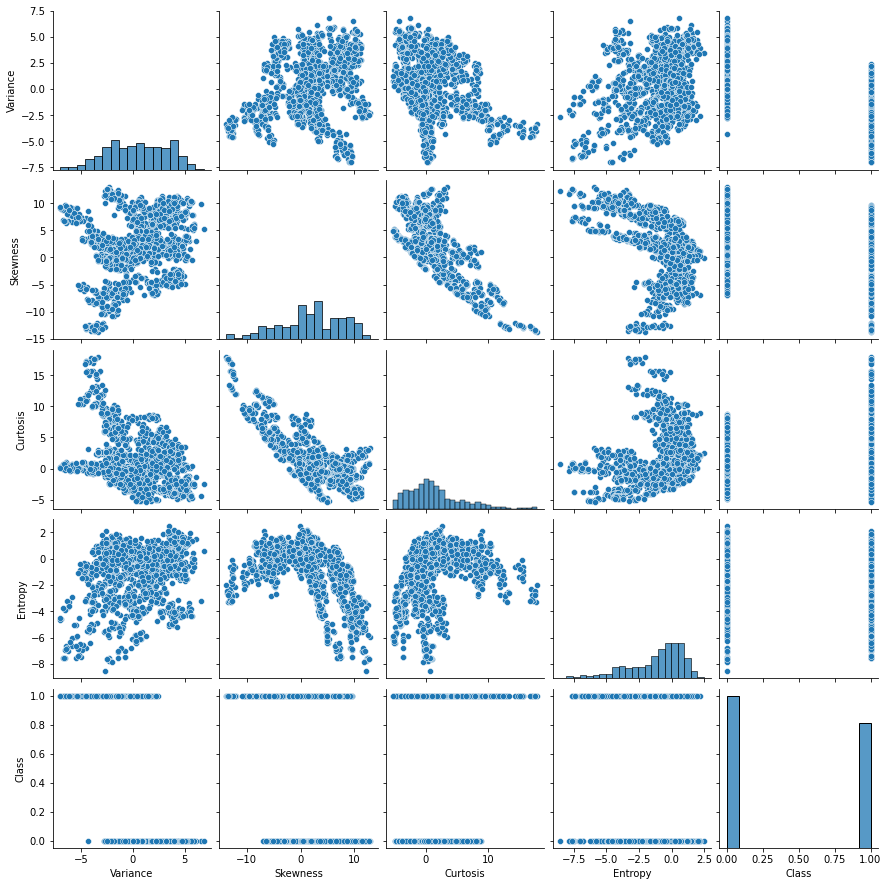

In [33]:
sns.pairplot(df)               #(pairplot= hist with scatter)

<AxesSubplot:xlabel='Curtosis', ylabel='Class'>

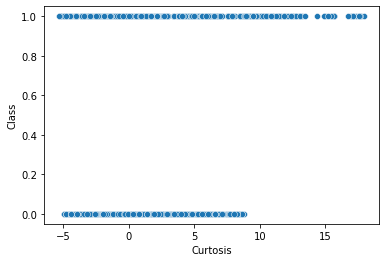

In [34]:
sns.scatterplot(x='Curtosis',y='Class',data=df)

<AxesSubplot:xlabel='Entropy', ylabel='Class'>

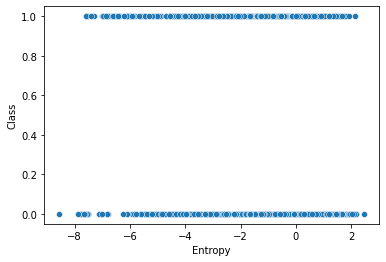

In [35]:
sns.scatterplot(x='Entropy',y='Class',data=df)

<AxesSubplot:xlabel='Class', ylabel='Skewness'>

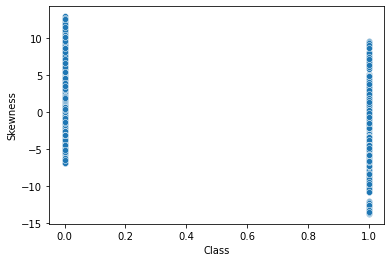

In [36]:
sns.scatterplot(x='Class',y='Skewness',data=df)

In [37]:
## Countplot ( Its same like histogram)

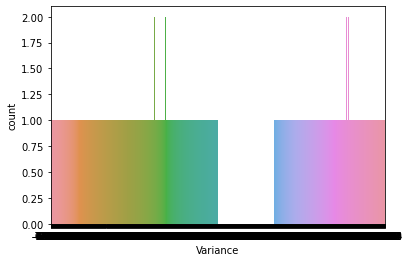

In [38]:
sns.countplot(df['Variance'])
plt.show()

In [39]:
# FEATURE SELECTION 

In [40]:
# Correlation & multi colinearity

In [41]:
cm=df.corr()
cm

,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.272863,-0.387171,0.273993,-0.735185
Skewness,0.272863,1.000000,-0.785376,-0.520293,-0.449835
Curtosis,-0.387171,-0.785376,1.000000,0.311379,0.154376
Entropy,0.273993,-0.520293,0.311379,1.000000,-0.033979
Class,-0.735185,-0.449835,0.154376,-0.033979,1.000000


<AxesSubplot:>

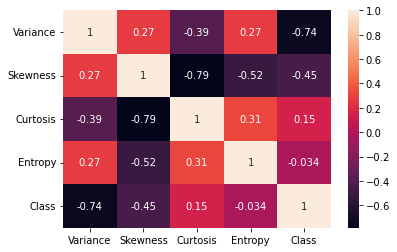

In [42]:
sns.heatmap(cm,annot=True)

In [43]:
# All feature has strong corelation with the target variable
# No multi-colinearity present (strong corelation between input features)

In [44]:
# Seperation of i/p & o/p feature

In [45]:
X=df.drop('Class',axis=1)
y=df['Class']

In [46]:
from sklearn.ensemble import ExtraTreesClassifier      # (Feature sellection )

In [47]:
et=ExtraTreesClassifier()
et.fit(X,y)

ExtraTreesClassifier()

In [48]:
a=et.feature_importances_
a

array([0.5169615 , 0.28416737, 0.13830089, 0.06057024])

In [49]:
s2=pd.Series(a,index=X.columns)
s2

Variance    0.516962
Skewness    0.284167
Curtosis    0.138301
Entropy     0.060570
dtype: float64

<AxesSubplot:>

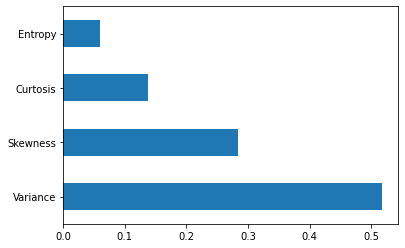

In [50]:
s2=pd.Series(a,index=X.columns)

s2.plot(kind='barh')

In [51]:
## All features has good score

In [52]:
# Encoding ......get_dummies, one_hot_encoder,label encoder, (manually= map, replace)

In [53]:
## Scalling

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
sc=StandardScaler()
X_sc=sc.fit_transform(X)

In [56]:
import pickle             #( it is using bcz we need sc for deployment )

In [57]:
# f=open('bankscaler', 'wb')        # wb= binary file
# pickle.dump(sc,f)
# f.close()

In [58]:
# Cross validation

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X_sc,y,test_size=0.2,random_state=11)

In [61]:
print(Xtrain.shape)
print(Xtest.shape)

(1078, 4)
(270, 4)


In [62]:
# Precision , Recall

# we need high Precision here

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, Xtrain, Xtest, ytrain, ytest):
    y_test_pred = model.predict(Xtest)
    y_train_pred = model.predict(Xtrain)

In [64]:
## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
model1=LogisticRegression(penalty='l2',C=1.0)
model1.fit(Xtrain,ytrain)

LogisticRegression()

In [67]:
evaluate(model1,Xtrain,Xtest,ytrain,ytest)

In [68]:
model1.score(Xtrain,ytrain)

0.9907235621521335

In [69]:
model1.score(Xtest,ytest)

1.0

In [70]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [72]:
d={}

In [73]:
d['Logistic']={'Train':99.07, 'Test':1.0,'Precision':1.0}

In [74]:
# knn

In [82]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(Xtrain,ytrain)

KNeighborsClassifier()

In [83]:
evaluate(model2, Xtrain,Xtest,ytrain,ytest)

In [84]:
d['knn']={'Train':99.7,'Test':99.63,'Precision':0.99}

In [85]:
d

{'Logistic': {'Train': 99.07, 'Test': 1.0, 'Precision': 1.0},
 'knn': {'Train': 99.7, 'Test': 99.63, 'Precision': 0.99}}

In [86]:
print(model2.score(Xtrain,ytrain))
print(mode12.score(Xtest,ytest))

0.9981447124304267


NameError: name 'mode12' is not defined

In [87]:
# Naive bays

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model3=GaussianNB()
model3.fit(Xtrain,ytrain)

In [ ]:
model3.score(Xtrain,ytrain)

In [ ]:
model3.score(Xtest,ytest)

In [ ]:
d['NB']={'Train':84.23,'Test':84.44,'Precision':0.99}

In [ ]:
# SVM model

In [ ]:
from sklearn.svm import SVR

In [ ]:
model4=SVR()
model4.fit(Xtrain,ytrain)

In [ ]:
model4.score(Xtrain,ytrain)

In [ ]:
model4.score(Xtest,ytest)

In [ ]:
d['SVM']={'Train':96.98,'Test':97.33,'Precision':0.99}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model5=RandomForestRegressor()
model5.fit(Xtrain,ytrain)

In [ ]:
model5.score(Xtrain,ytrain)

In [ ]:
model5.score(Xtest,ytest)

In [ ]:
d['RFR']={'Train':99.47,'Test':95.06,'Precision':0.99}

In [ ]:
# Boosting algorithm

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier         #(Its a boosting type algorithms)( and random forest is bagging type of algorithms)
model6=XGBClassifier(n_estimators=100,learning_rate=1.0)
model6.fit(Xtrain,ytrain)

In [ ]:
model6.score(Xtrain,ytrain)

In [ ]:
model6.score(Xtest,ytest)

In [ ]:
d['ygb']={'Train':100,'Test':100,'Precision':100}

In [ ]:
d

In [ ]:
d={'Logistic': {'Train': 99.07, 'Test': 100, 'Precision': 100},
 'knn': {'Train': 100, 'Test': 100, 'Precision': 100},
 'ygb': {'Train': 100, 'Test': 100, 'Precision': 100},
 'RFR': {'Train': 99.47, 'Test': 95.06, 'Precision': 0.99},
 'SVM': {'Train': 96.98, 'Test': 97.33, 'Precision': 0.99},
  'NB': {'Train': 84.23, 'Test': 84.44, 'Precision': 0.99}}


In [ ]:
df1=pd.DataFrame(d)

In [ ]:
df1

In [ ]:
df1.plot(kind='barh')
plt.legend(loc=2)

In [ ]:
# OR
df1.plot(kind='barh',legend=False,figsize=(10,7))
plt.grid()

In [ ]:
## RANDOM FOREST IS BEST MODEL HERE.. IT BAGGING TYPE ML ALGORITHM.
#  It avoids overgitting

In [ ]:
# Conclusion

#random forest 

In [ ]:
import pickle

f=open('bankmodel','wb')          # mode(wb)
pickle.dump(model5,f)
f.close()

In [ ]:
# DEPLOYMENT ( we have to perform deployment in pychamp)

In [ ]:
import tkinter

In [ ]:
win=Tk()
win.title('Bank Notes Prediction')
win.configure(bg='cyan')
win.geometry('800*400')  # Its for page size

l0=Label(win, text='Bank notes prediction system',bd=5, relief='ridge',
         bg='white',fg='black',width=40, font=('times new roman',18,'bold'))

l0.place(x=280,y=40)


l1=Label(win, text='Bank notes prediction system',bd=5, relief='ridge',
         bg='white',fg='black',width=25, font=('times new roman',12,'bold'))

l1.place(x=100,y=140)

# l2=Label(win, text='Bank notes prediction system',bd=5, relief='ridge',
#          bg='white',fg='black',width=40, font=('times new roman',12,'bold'))

# l2.place(x=350,y=180)

l3=Label(win, text='CURTOSIS',bd=5, relief='ridge',
         bg='white',fg='black',width=25, font=('times new roman',12,'bold'))

l3.place(x=350,y=220)

e3=StringVar()
e3=Entry(win,textvariable=c1,bd=5, relief='ridge',
         bg='white',fg='black',width=25, font=('times new roman',12,'bold')
         
         
l4=Label(win, text='CURTOSIS',bd=5, relief='ridge',
         bg='white',fg='black',width=25, font=('times new roman',12,'bold'))

l4.place(x=400,y=260)

e4=StringVar()
e4=Entry(win,textvariable=c1,bd=5, relief='ridge',
         bg='white',fg='black',width=25, font=('times new roman',12,'bold')

         
         
         

win.mainloop()